# Principal Component Analysis (PCA)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array([[1.0,1.3], [1.3,1.5]])

data = np.random.multivariate_normal(mean_01,cov_01,800)
print(data.shape)

(800, 2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


/home/rishi/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


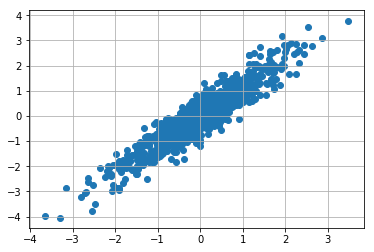

In [3]:
plt.figure(0)
plt.grid("on")
plt.scatter(data[:,0], data[:,1])
plt.show()

In [4]:
def pca(X, k=None):
    if k is None:
        k = X.shape[1]
    
    # covariance of X
    A = np.cov(X.T)  # assumes n as 1st dimension
    
    # eigenvalues and eigenvectors
    eg_val,eg_vec = np.linalg.eig(A)
    
    return eg_val,eg_vec   

In [5]:
lam, P = pca(data)
print(lam.shape, P.shape)

(2,) (2, 2)


In [6]:
print(lam)
print(P)

[0.07767487 2.42582878]
[[-0.76750799 -0.64103938]
 [ 0.64103938 -0.76750799]]


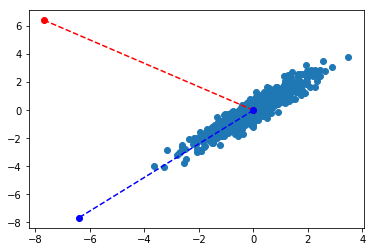

In [7]:
plt.figure(0)
plt.scatter(data[:,0],data[:,1])
# plt.plot([x1,x2],[y1,y2])
plt.plot([0,10*P[0,0]],[0,10*P[1,0]], 'ro--',)
plt.plot([0,10*P[0,1]],[0,10*P[1,1]], 'bo--')
plt.show()

In [8]:
# explained_variance along PC1
var_pc1 = lam[1]/(lam[0]+lam[1])
print(var_pc1)

0.9689735327469986


In [9]:
Z = data.dot(P)
print(Z.shape)
print(Z[:10])

(800, 2)
[[ 0.43571398 -0.55029854]
 [ 0.25914668 -0.33343225]
 [ 0.35904528  1.37221457]
 [-0.09033628  0.65879879]
 [-0.13287071 -1.65525963]
 [ 0.02540634  0.69976688]
 [-0.26857145 -0.43037347]
 [ 0.3121455  -2.43909508]
 [-0.47829586  1.46954123]
 [-0.40056734  1.14280359]]


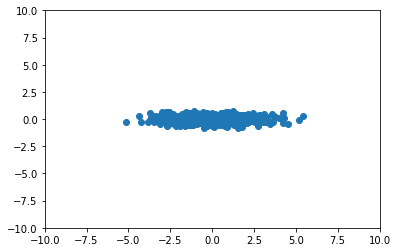

In [10]:
plt.figure(0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(Z[:,1],Z[:,0]) # PC1 = ev2, PC2 = ev1
plt.show()

# PCA on MNIST Dataset

In [11]:
ds = pd.read_csv("./MNIST.csv")
data = ds.values[:2000,1:]
y = ds.values[:2000,0]
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([196, 217, 237, 173, 203, 187, 211, 194, 184, 198]))


In [12]:
print(data.shape,y.shape)

(2000, 784) (2000,)


In [13]:
A = np.cov(data.T)
print(A.shape)

(784, 784)


In [14]:
eig_val,eig_vec = np.linalg.eig(A)
print(eig_val.shape)

(784,)


In [15]:
eig_list = []
for ix in range(eig_val.shape[0]):
    temp = [eig_val[ix],eig_vec[ix]]
    eig_list.append(temp)
    
print(len(eig_list))

784


In [16]:
eig_list = sorted(eig_list, key=lambda x : x[0], reverse=True)

In [17]:
sorted_lamda = []
sorted_P = []

for ix in range(len(eig_list)):
    sorted_lamda.append(eig_list[ix][0])
    sorted_P.append(eig_list[ix][1])
    
sorted_lamda = np.asarray(sorted_lamda)
sorted_P = np.asarray(sorted_P)

/home/rishi/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


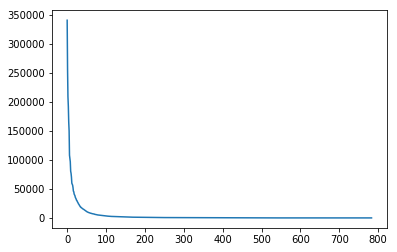

In [18]:
# plot of eigenvalues

plt.plot(sorted_lamda)

/home/rishi/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/rishi/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


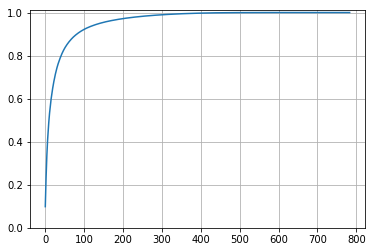

In [19]:
# explained variances
plt.figure(11)
plt.grid("on")
plt.ylim(0,1.01)
plt.plot(np.cumsum(sorted_lamda)/sorted_lamda.sum())
plt.show()

In [20]:
explained_variances = np.cumsum(sorted_lamda)/sorted_lamda.sum()
explained_variances[2]

(0.23249083093643033+0j)

In [21]:
Z = data.dot(sorted_P)
print(data.shape)

(2000, 784)


In [22]:
img_org = data[0].reshape((28,28))
img_reco = Z[0].astype(np.uint8).reshape((28,28))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


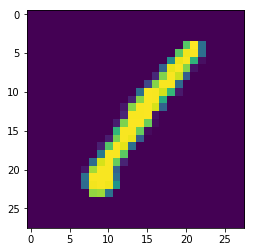

In [23]:
plt.imshow(img_org)

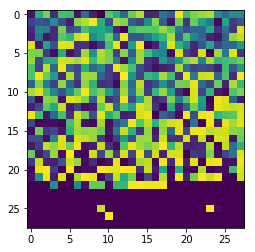

In [24]:
plt.imshow(img_reco)

In [26]:
pca = PCA(n_components=2)

X_t = pca.fit_transform(data)
print(X_t.shape)

(2000, 2)


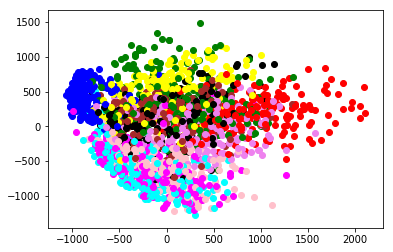

In [27]:
colors = ['red','blue','green','yellow','pink','black','violet','cyan','brown','magenta']
plt.figure()
for ix in range(X_t.shape[0]):
    plt.scatter(X_t[ix,0], X_t[ix,1], color= colors[y[ix]])
plt.show()